### Geo data analysis

In [1]:
#Libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import folium


Description of the AirBnb related data:
https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1938308660

Another approach for extracting points of interest -> using this article: 
https://www.urlaub-reise-tourismus.de/berlin-sehenswuerdigkeiten-a-z/

In [3]:
#Import all datasets

listings_raw_short = pd.read_csv("../data - AirBnb/listings.csv")
listings_raw = pd.read_csv("../data - AirBnb/listings.csv.gz", compression='gzip')

calendar_raw = pd.read_csv("../data - AirBnb/calendar.csv.gz")

reviews_raw_short = pd.read_csv("../data - AirBnb/reviews.csv")
reviews_raw = pd.read_csv("../data - AirBnb/reviews.csv.gz", compression='gzip')

poi2_raw = pd.read_csv("../data - Tourpedia/berlin-poi2.csv")

In [44]:
listings_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

#### Data Cleaning

In [4]:
#Lets create a listings datasets that we will work with

listings = listings_raw [['id', 'listing_url', 'name',
       'host_id', 'host_since', 'host_acceptance_rate', 'host_is_superhost', 'calculated_host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 
       'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
       'has_availability',  'availability_365', 
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review', 'reviews_per_month']]

listings.columns = ['id', 'listing_url', 'name',
       'host_id', 'host_since', 'host_acceptance_rate', 'host_is_superhost', 'calculated_host_listings_count',
       'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 
       'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
       'has_availability',  'availability_365', 
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review', 'reviews_per_month']

pd.set_option('display.max_columns', None)
listings.head()


,id,listing_url,name,host_id,host_since,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,2008-10-19,17%,f,1,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,$83.00,63.0,184.0,t,15,148,1,2023-05-25,0.84
1,9991,https://www.airbnb.com/rooms/9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,2009-08-25,NaN,f,1,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,$180.00,6.0,14.0,t,47,7,0,2020-01-04,0.07
2,183988,https://www.airbnb.com/rooms/183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,2011-07-28,99%,f,1,Neue Kantstraße,Charlottenburg-Wilm.,52.50001,13.30349,Entire rental unit,Entire home/apt,4,$116.00,2.0,365.0,t,336,570,50,2023-11-26,3.92
3,14325,https://www.airbnb.com/rooms/14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,2009-11-18,47%,f,4,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,$70.00,150.0,1125.0,t,107,26,1,2023-11-30,0.16
4,186663,https://www.airbnb.com/rooms/186663,Rental unit in Berlin · ★4.40 · 1 bedroom · 2 ...,897302,2011-07-31,100%,f,4,Zehlendorf Nord,Steglitz - Zehlendorf,52.43430,13.23037,Entire rental unit,Entire home/apt,2,$100.00,183.0,730.0,t,364,15,0,2016-05-16,0.11


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 0 to 13326
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13327 non-null  int64  
 1   listing_url                     13327 non-null  object 
 2   name                            13327 non-null  object 
 3   host_id                         13327 non-null  int64  
 4   host_since                      13318 non-null  object 
 5   host_acceptance_rate            9021 non-null   object 
 6   host_is_superhost               13285 non-null  object 
 7   calculated_host_listings_count  13327 non-null  int64  
 8   neighbourhood                   13327 non-null  object 
 9   neighbourhood_group             13327 non-null  object 
 10  latitude                        13327 non-null  float64
 11  longitude                       13327 non-null  float64
 12  property_type                   

In [58]:
listings_raw.shape

(13327, 75)

In [59]:
listings.shape

(9370, 26)

In [6]:
listings.isna().sum()

id                                   0
listing_url                          0
name                                 0
host_id                              0
host_since                           9
host_acceptance_rate              4306
host_is_superhost                   42
calculated_host_listings_count       0
neighbourhood                        0
neighbourhood_group                  0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
price                             3953
minimum_nights_avg_ntm               1
maximum_nights_avg_ntm               1
has_availability                  3953
availability_365                     0
number_of_reviews                    0
number_of_reviews_ltm                0
last_review                       3000
reviews_per_month                 3000
dtype: int64

Now we need to do some data cleaning. 
Firstly, we will convert variables to their expected datatypes.

In [7]:
listings.head()

,id,listing_url,name,host_id,host_since,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,2008-10-19,17%,f,1,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,$83.00,63.0,184.0,t,15,148,1,2023-05-25,0.84
1,9991,https://www.airbnb.com/rooms/9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,2009-08-25,NaN,f,1,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,$180.00,6.0,14.0,t,47,7,0,2020-01-04,0.07
2,183988,https://www.airbnb.com/rooms/183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,2011-07-28,99%,f,1,Neue Kantstraße,Charlottenburg-Wilm.,52.50001,13.30349,Entire rental unit,Entire home/apt,4,$116.00,2.0,365.0,t,336,570,50,2023-11-26,3.92
3,14325,https://www.airbnb.com/rooms/14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,2009-11-18,47%,f,4,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,$70.00,150.0,1125.0,t,107,26,1,2023-11-30,0.16
4,186663,https://www.airbnb.com/rooms/186663,Rental unit in Berlin · ★4.40 · 1 bedroom · 2 ...,897302,2011-07-31,100%,f,4,Zehlendorf Nord,Steglitz - Zehlendorf,52.43430,13.23037,Entire rental unit,Entire home/apt,2,$100.00,183.0,730.0,t,364,15,0,2016-05-16,0.11


In [8]:
#Price
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

#Categorical variables
listings[['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type']] = listings[['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type']].astype("category")

#Acceptance rate
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

#Binary
listings['host_is_superhost'] = np.where(listings['host_is_superhost'] == 't', 1, 0)
listings['has_availability'] = np.where(listings['has_availability'] == 't', 1 , 0)

#Property type - create new column 
listings['isHotel'] = ((listings['property_type'].str.contains('hotel|hostel|guesthouse|breakfast', case=False, regex=True)) | (listings['room_type'] == 'Hotel room')).astype(int)

#Ownership
def conditions(i): 
    if i == 1: return 1
    if i == 2: return 2
    if i == 3: return 3
    if i > 3: return '3+'

listings['calculated_host_listings_count_cat']=listings['calculated_host_listings_count'].apply(conditions)




/var/folders/b1/_7msyyfn327_xyf927r6lmwc0000gn/T/ipykernel_1873/3225116035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/b1/_7msyyfn327_xyf927r6lmwc0000gn/T/ipykernel_1873/3225116035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings[['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type']] = listings[['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type']].astype("c

In [9]:
listings.describe()

,id,host_id,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,latitude,longitude,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,reviews_per_month,isHotel
count,1.332700e+04,1.332700e+04,9021.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,9374.000000,13326.000000,1.332600e+04,13327.000000,13327.000000,13327.000000,13327.000000,10327.000000,13327.000000
mean,2.726391e+17,1.481982e+08,81.236448,0.198769,9.276131,52.509764,13.402477,2.934794,124.517068,47.545392,1.128774e+06,0.700683,120.597809,37.285210,9.102649,1.152360,0.053726
std,4.000348e+17,1.686400e+08,27.469206,0.399089,31.789247,0.033481,0.066762,1.864588,383.751953,67.192805,4.920747e+07,0.457976,135.093951,82.934263,20.630024,1.820554,0.225484
min,3.176000e+03,1.581000e+03,0.000000,0.000000,1.000000,52.369040,13.107580,1.000000,9.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,1.723423e+07,1.362112e+07,71.000000,0.000000,1.000000,52.490371,13.364285,2.000000,62.000000,2.000000,3.650000e+02,0.000000,0.000000,1.000000,0.000000,0.130000,0.000000
50%,3.916137e+07,6.108240e+07,96.000000,0.000000,1.000000,52.509630,13.411440,2.000000,91.000000,6.800000,1.125000e+03,1.000000,58.000000,7.000000,1.000000,0.510000,0.000000
75%,6.968867e+17,2.577263e+08,100.000000,0.000000,3.000000,52.532395,13.438163,4.000000,139.000000,92.000000,1.125000e+03,1.000000,257.000000,33.000000,10.000000,1.580000,0.000000
max,1.049081e+18,5.510794e+08,100.000000,1.000000,231.000000,52.656110,13.721390,16.000000,24999.000000,1100.000000,2.147484e+09,1.000000,365.000000,2363.000000,716.000000,56.730000,1.000000


In [10]:
#Price
listings = listings[listings.price < 3000] #exclude listings with too high price & NAN price

In [11]:
listings.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_since',
       'host_acceptance_rate', 'host_is_superhost',
       'calculated_host_listings_count', 'neighbourhood',
       'neighbourhood_group', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review',
       'reviews_per_month', 'isHotel', 'calculated_host_listings_count_cat'],
      dtype='object')

#### Basic exploratory analysis

In [12]:
#Create a map of Berlin districts 

df2 = listings[['longitude', 'latitude', 'name', 'price']]
berlin_map = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=12)

belin_boroughs = "../data - AirBnb/neighbourhoods.geojson"
#berlin_price = listings.groupby(by="neighbourhood_group").median().reset_index()

'''folium.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    columns='neighbourhood_group',
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(berlin_map)

folium.LayerControl().add_to(berlin_map)

'''

folium.GeoJson(belin_boroughs, name='geojson').add_to(berlin_map)


berlin_map

##### Property types

Main questions of the section
1. Percentage of "hotels" and "shared economy properties" listed on airbnb?
2. Are properties of different types distributed evenly around the city?
3. Are there any differences in location patterns for hotels and airbnbs?

In [13]:
#% of hotels listings on AirBnb
listings[listings['isHotel'] == 1]['id'].count()*100/ listings['id'].count()

7.51334044823906

7,5% of all listings in our dataset are related to hotels/hostels. Let's now see how hotels vs flats are distributed around the city and POIs. 

In [14]:
#% of non-shared property among all listings not related to hotels
listings[(listings['isHotel'] == 0) & (listings['room_type'] == 'Entire home/apt')]['id'].count()*100 / listings[listings['isHotel'] == 0]['id'].count()

74.98269097622894

In [15]:
#% of non-shared property among all listings 
listings[listings['room_type'] == 'Entire home/apt']['id'].count()*100/ listings['id'].count()

70.33084311632871

In [45]:
#Non-hotels
ngf = listings[listings['isHotel'] == 0]['neighbourhood_group'].value_counts().reset_index()
ngf.columns = ['neighbourhood_group', 'count']
ngf['percent'] = ngf['count']/ngf['count'].sum() * 100


#Hotels
ngh = listings[listings['isHotel'] == 1]['neighbourhood_group'].value_counts().reset_index()
ngh.columns = ['neighbourhood_group', 'count']
ngh['percent'] = ngh['count']/ngh['count'].sum() * 100

In [17]:
#Districts where most hotels are located
ngh

,neighbourhood_group,count,percent
0,Mitte,186,26.420455
1,Friedrichshain-Kreuzberg,124,17.613636
2,Charlottenburg-Wilm.,108,15.340909
3,Pankow,105,14.914773
4,Tempelhof - Schöneberg,69,9.801136
5,Treptow - Köpenick,33,4.687500
6,Neukölln,29,4.119318
7,Lichtenberg,17,2.414773
8,Reinickendorf,14,1.988636
9,Spandau,11,1.562500


In [18]:
#Districts where most flats are located
ngf

,neighbourhood_group,count,percent
0,Mitte,1931,22.282483
1,Friedrichshain-Kreuzberg,1834,21.163166
2,Pankow,1414,16.316640
3,Charlottenburg-Wilm.,912,10.523886
4,Neukölln,772,8.908378
5,Tempelhof - Schöneberg,582,6.715901
6,Treptow - Köpenick,377,4.350335
7,Steglitz - Zehlendorf,257,2.965613
8,Lichtenberg,218,2.515578
9,Reinickendorf,144,1.661666


We see that according to 2 dataframes Airbnb listings that are related to hotels tend to concentrate in slightly different neighbourhoods. Let's extend our hotels dataset with some external data and see if hotels and flats are indeed tend to form different clasters.

In [19]:
#Import external information about hotels
hotels = pd.read_csv('../data - Tourpedia/berlin-accommodation_v2.csv', sep = ';')


In [20]:
#Create heatmaps for hotels and flats
from folium.plugins import HeatMap

df1 = poi2_raw
df2 = listings[listings['isHotel']==0][['longitude', 'latitude', 'name', 'price']]
df3 = hotels[['lng', 'lat', 'name']]

m0 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=12)

gradient2 = {.2: 'blue', .7: 'lightblue', 1: 'darkblue'}
m0.add_child(HeatMap(df2[['latitude', 'longitude']].values, radius=15, gradient=gradient2, min_opacity=0.25, blur = 10))

gradient3 = {.2: 'red', .7: 'brown', 1: 'yellow'}
m0.add_child(HeatMap(df3[['lat', 'lng']].values, radius=12, gradient=gradient3, min_opacity=0.2))

# POIs

for index, row in df1.iterrows():
    folium.Circle(
        location=[row['lat'], row['lng']],
        popup=row['name'],  # You can customize the popup content
        radius=30, 
        fill_color="lime", 
        fill_opacity=0.5, 
        color="lime"
      
    ).add_to(m0)

m0

According to the map above, we see that hotels (redish colors) tend to group in western part of the city while AirBnb flats (blueish colors) tend to form clasters in eastern part of the city. Therefore, we can say that presense of AirBnb helps to include additional districts of the city in the tourism-related economy. 

Now let's compare room types of listings that are not related to hotels.
We can see that 'Entire home/apt' stays the most popular category among all districts however the percentage of other categories tend to grow in some districts.

In [21]:
ngrt = listings[listings['isHotel']==0][['neighbourhood_group', 'room_type']]
ngrt_crosstab = pd.crosstab(ngrt.neighbourhood_group, ngrt.room_type)
ngrt_crosstab = ngrt_crosstab.sort_values(by = 'Entire home/apt', ascending = False)
ngrt_crosstab

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Mitte,1613,298,20
Friedrichshain-Kreuzberg,1303,525,6
Pankow,1096,312,6
Charlottenburg-Wilm.,693,214,5
Neukölln,526,243,3
Tempelhof - Schöneberg,454,127,1
Treptow - Köpenick,284,90,3
Steglitz - Zehlendorf,177,76,4
Lichtenberg,150,64,4


In [22]:
ngrt_percentages = ngrt_crosstab.div(ngrt_crosstab.sum(axis=1), axis=0) * 100
ngrt_percentages = ngrt_percentages.sort_values(by='Entire home/apt', ascending=False)
ngrt_percentages

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Mitte,83.531849,15.432418,1.035733
Tempelhof - Schöneberg,78.006873,21.821306,0.171821
Pankow,77.510608,22.065064,0.424328
Charlottenburg-Wilm.,75.986842,23.464912,0.548246
Treptow - Köpenick,75.331565,23.872679,0.795756
Friedrichshain-Kreuzberg,71.046892,28.625954,0.327154
Steglitz - Zehlendorf,68.871595,29.571984,1.556420
Lichtenberg,68.807339,29.357798,1.834862
Neukölln,68.134715,31.476684,0.388601


In [23]:
#Create heatmaps for hotels and flats
from folium.plugins import HeatMap

df1 = poi2_raw
df2 = listings[listings['room_type']=='Entire home/apt'][['longitude', 'latitude', 'name', 'price']]
df3 = listings[(listings['room_type']=='Private room') | (listings['room_type']=='Shared room')][['longitude', 'latitude', 'name', 'price']]

m1 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=12)

gradient2 = {.2: 'blue', .66: 'lightblue', 1: 'darkblue'}
m1.add_child(HeatMap(df3[['latitude', 'longitude']].values, radius=15, gradient=gradient2, min_opacity=0.25, blur = 10))

gradient3 = {.2: 'red', .66: 'brown', 1: 'yellow'}
m1.add_child(HeatMap(df2[['latitude', 'longitude']].values, radius=12, gradient=gradient3, min_opacity=0.2))

# POIs

for index, row in df1.iterrows():
    folium.Circle(
        location=[row['lat'], row['lng']],
        popup=row['name'],  # You can customize the popup content
        radius=30, 
        fill_color="lime", 
        fill_opacity=0.5, 
        color="lime"
      
    ).add_to(m1)

m1

On the map above we can see that category "Entire home/apartment" (blueish colours) tend to form clusetrs in other locations compared to "Shared room/flat" properties. Also, according to the calculations above, we can notice that % of shared properties significantly higher for some districts. Moreover, in Spandau % of property type "shared room" is too high compared to other districts, therefore, we can probably assume that there is a hostel (or another commertial property) that is located there and all postings belong to one owner. 

We can conclude that:
1. "Hotels" and "Flats" tend to form clusters in different districts of the city. However, both types of accomodation are located close to the city center and POIs.
2. "Shared rooms" and "Entire properties" also tend to be distributed unevenly around the city.

#### Ownership

Now, let's explore ownership structure of listings. Main questions of the section:
1. Who own properties of different types?

In [192]:
#### Ownership
os = listings[listings['isHotel']==0][['room_type', 'calculated_host_listings_count_cat']]
os_crosstab = pd.crosstab(os.room_type, os.calculated_host_listings_count_cat)
os_crosstab = os_crosstab.sort_values(by = 1, ascending = False)
os_crosstab

calculated_host_listings_count_cat,1,2,3,3+
room_type,,,,
Entire home/apt,3257,696,351,2194
Private room,1247,366,117,356
Shared room,17,1,2,62


In [57]:
listings.shape

(9370, 26)

In [61]:
os = listings[listings['isHotel']==0][['room_type', 'calculated_host_listings_count_cat']]

os.groupby('calculated_host_listings_count_cat')['room_type'].count()

calculated_host_listings_count_cat
1     4521
2     1063
3      470
3+    2612
Name: room_type, dtype: int64

In [196]:
os_percentages = os_crosstab.div(os_crosstab.sum(axis=1), axis=0) * 100
os_percentages = os_percentages.sort_values(by=1, ascending=False)
os_percentages

calculated_host_listings_count_cat,1,2,3,3+
room_type,,,,
Private room,59.779482,17.545542,5.608821,17.066155
Entire home/apt,50.123115,10.710988,5.401662,33.764235
Shared room,20.731707,1.219512,2.439024,75.609756


Before calculating ownership structure we excluded all listings that can be identified as hotels. For other listings we can assume that they were posted by privat users (and not commercial accounts). However, we can see that even for the property type "entire house" % of people who rents another 3+ listings is quite high meaning that high % of airbnb users actually consider renting properties through airbnb as some kind of business.

#### Prices

Of course for many users price is considered to be one of the most important criterias when chossing a place to stay. Here we want to compare price distribution for different property types and districts of the city.

/var/folders/b1/_7msyyfn327_xyf927r6lmwc0000gn/T/ipykernel_2909/3276254307.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listings.price, shade=True, clip=(0, 500))


Text(0.5, 1.0, 'Berlin AirBnB Price distribution')

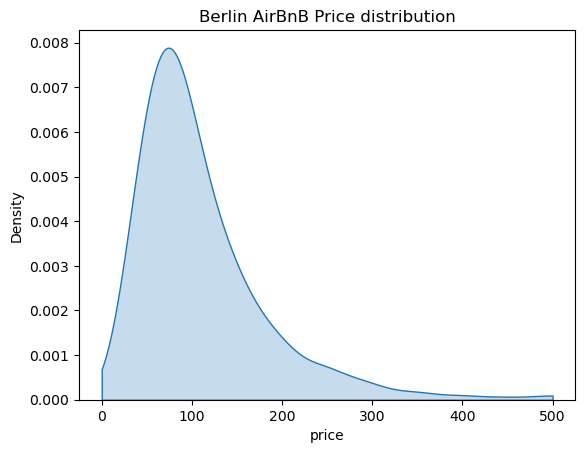

In [7]:
#Now lots plot prices distribution
sns.kdeplot(listings.price, shade=True, clip=(0, 500))
plt.title("Berlin AirBnB Price distribution")

In [49]:
df = listings[listings['isHotel']==0][['room_type', 'price', 'neighbourhood_group']]

df.groupby('neighbourhood_group')['price'].mean().sort_values()

/var/folders/b1/_7msyyfn327_xyf927r6lmwc0000gn/T/ipykernel_1873/666411294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('neighbourhood_group')['price'].mean().sort_values()


neighbourhood_group
Spandau                      76.076336
Reinickendorf                78.520833
Marzahn - Hellersdorf        80.489362
Lichtenberg                 102.059633
Neukölln                    103.045337
Tempelhof - Schöneberg      105.721649
Steglitz - Zehlendorf       106.058366
Treptow - Köpenick          110.302387
Charlottenburg-Wilm.        111.369518
Friedrichshain-Kreuzberg    115.902944
Pankow                      119.169024
Mitte                       142.393061
Name: price, dtype: float64

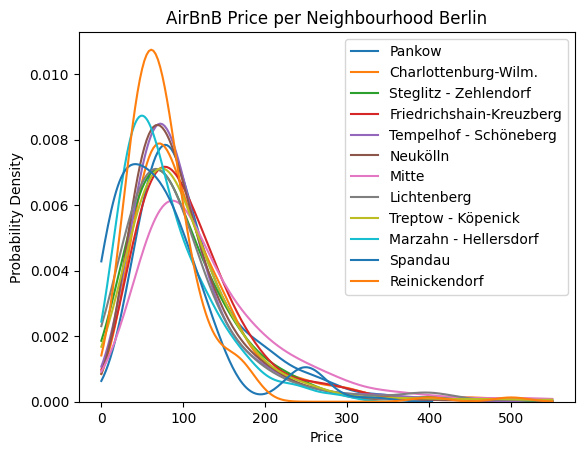

In [40]:
df = listings[listings['isHotel']==0][['room_type', 'price', 'neighbourhood_group']]

for hood in df.neighbourhood_group.unique():
    sns.kdeplot(df[df.neighbourhood_group==hood].price, fill=False, clip=(0, 550), label = hood)

  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Neighbourhood Berlin for non hotels')
plt.legend()

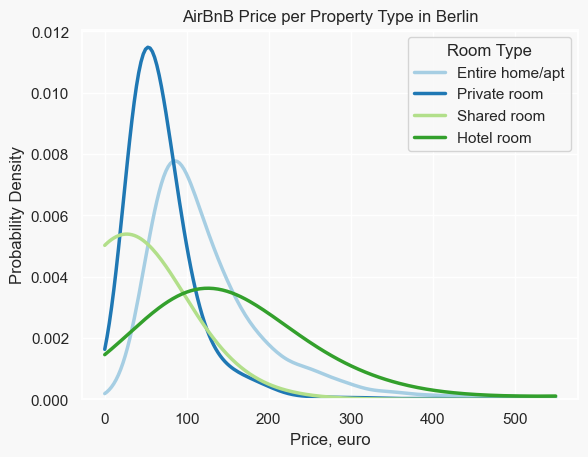

In [95]:

# Set a seaborn style
#sns.set(style="white", palette="Paired", color_codes=True)
sns.set (palette = "Paired", rc={'axes.facecolor':'#f8f8f8ff', 'figure.facecolor':'#f8f8f8ff'})


# Create a figure and axis
#plt.figure(figsize=(1, 8))

# Plot KDE for each room type
for rt in listings.room_type.unique():
    sns.kdeplot(
        listings[listings.room_type == rt].price,
        fill=False,
        clip=(0, 550),
        label=rt,
        linewidth=2.5,  # Adjust the line width
        linestyle='-'  # Solid line style
    
    )


# Set labels and title
plt.xlabel('Price, euro')
plt.ylabel('Probability Density')
plt.title('AirBnB Price per Property Type in Berlin')

# Add legend with a title
plt.legend(title='Room Type', loc='upper right')

# Show the plot
plt.show()


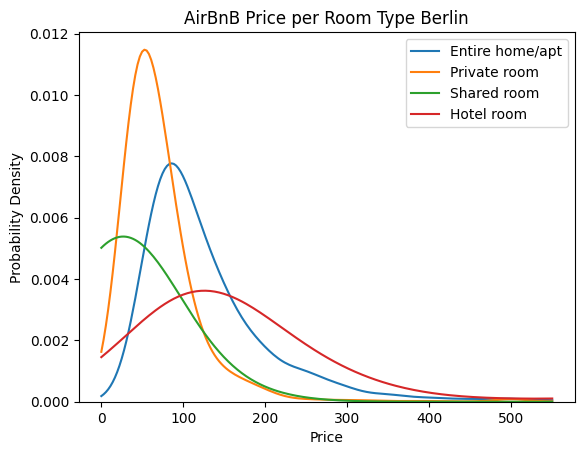

In [35]:
#Prices per property type

for rt in listings.room_type.unique():
    sns.kdeplot(listings[listings.room_type==rt].price, fill=False, clip=(0, 550), label = rt)

  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Room Type Berlin')
plt.legend()